# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [3]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [4]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [ ]:
# В pandas функции применяются к каждому элементу серии и к серии целиком методом apply.
# В pandas есть 2 случая применения функций к данным:
# 1. element-wise - когда функция применяется к каждому элементу серии / столбцу.
# 2. vectorized - когда функция применяется к серии / строке целиком. В этом случае в коде функции можно использовать значение любого столбца.
# В данном случае мы используем element-wise применение функции watcher ко всему столбцу orders, т.е. к каждому элементу этого столбца.
# Происходит следующее:
#   1. Берется первый элемент столбца orders (2) и передается в функцию watcher.
#   2. Функция watcher присваивает значение столбца order переменной param и в строке return проверяет равенство param == 0 или 2 == 0 и возвращает True или False. В первом случае это False потому что 2 != 0, во втором False? т.е. 4 != 0, а в третьем True потому что 0 == 0.
# В результате мы получаем новый столбец watcher, который был создан df[watcher] со значениями True и False в каждой строке.
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,calculated,watcher
0,1,163,2,False,False
1,2,130,4,False,False
2,3,97,0,True,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [8]:
# Это случай когда в функцию надо передать сразу несколько значений из разных столбцов.
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [ ]:
# Это пример создания одной строки как бы из dataframe для тестирования функции.
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
# Потом просто вызывается функция, которая была создана, и в неё передаётся созданная тестовая строка и можно увидеть результат работы функции на одной строке.
conversion(row1)

# После тестирования уже можно применять функцию ко всему dataframe

0    0.01227
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [18]:
# Это метод быстрого создания тестового dataframe для тестирования функции
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [19]:
# И главное отличие синтаксиса от случая применения функции к кажому элементу столбца / серии в том, что метод apply пописывается для всего dataframe (df.apply), а не для столбца (df['orders'].apply).
# Также важен параметр axis=1, который указывает что функция применяется к строкам (По умолчанию axis=0 всегда и означает: к столбцам).
# И второе отличие в том, что в функцию передается не значение столбца (param), а вся строка (row).
# Поэтому в теле функции мы можем использовать значения любых столбцов, обращаясь к ним как к элементам словаря row['orders'], row['clicks'] и т.д.
# В результате создаётся новый столбец conversion, который мы создаём df['conversion'] и в каждую строку которого записывается результат применения функции conversion. df.apply говорит, что функция применяется ко всему dataframe, axis=1 говорит, что функция применяется к строкам, а не к столбцам, и в функцию передается вся строка:
#   -метод apply берёт кажду строку dataframe по очереди и передает её в функцию conversion.
#   -функция conversion получает строку и в теле функции мы можем использовать значения любых столбцов этой строки.
#   -функция возвращает результат вычисления конверсии, который записывается в новый столбец conversion.
df['conversion'] = df.apply(conversion, axis=1)

In [20]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


In [ ]:
# В итоге:
# -если функция работает с одним столбцом, то она применяется к этому столбцу методом apply: df['orders'].apply(func)
# -если функция работает с несколькими столбцами, то она применяется ко всему dataframe методом apply с параметром axis=1: df.apply(func, axis=1). В этом случае в функцию передается вся строка и становятся доступны значения всех столбцов этой строки.

### Как создавать столбцы с помощью функций

In [30]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [31]:
df

,user_id
0,1
1,2
2,3


In [32]:
# В этой функции возвращаются столбцы, которые создаются налету, а 1 возвращается по умолчанию.

def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [33]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


In [34]:
# Также новый столбец можно создавать прямо в функции.
# В этом случае в функции, к примеру, производятся какие-то расчёты и функция возвращает значение для нового столбца.
def metriks2(row):
    row['another_column'] = 1
    
    return row

df2 = df
df2 = df2.apply(metriks2, axis=1)
df2

,col_1,col_2,col_3,another_column
0,1.0,NaN,NaN,1.0
1,NaN,1.0,NaN,1.0
2,NaN,NaN,1.0,1.0


### Анализ рекламных кампаний

In [ ]:
import pandas as pd

In [37]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [ ]:
# Настоятельно рекомендуется в любом dataset менять заголовки на английские аналоги.
# Сделать это можно методом rename или просто переобозначив столбцы, но важно соблюдать тот же порядок, что и в dataframe

stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [39]:
phrase = 'МРТ на Менделеевской от 2000'

In [40]:
len(phrase.split(' '))

5

In [42]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [43]:
# Также lambda функции можно применять ко всему dataframe. В этом случае в x (в переменную) будет попадать вся строка и уже потом обращаясь к значению конкретного столбца применяется lambda функция 
# Обязательно надо указывать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [44]:
%matplotlib inline

<Axes: >

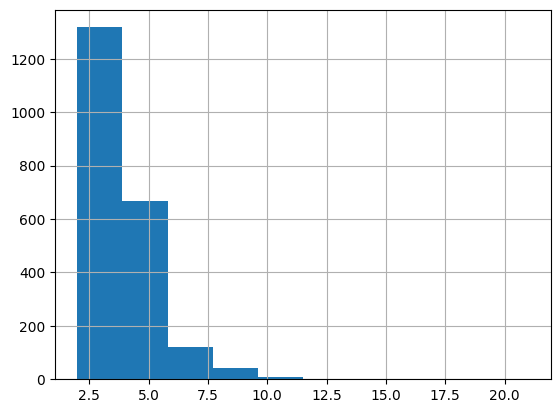

In [45]:
stats['word_count'].hist()

<Axes: >

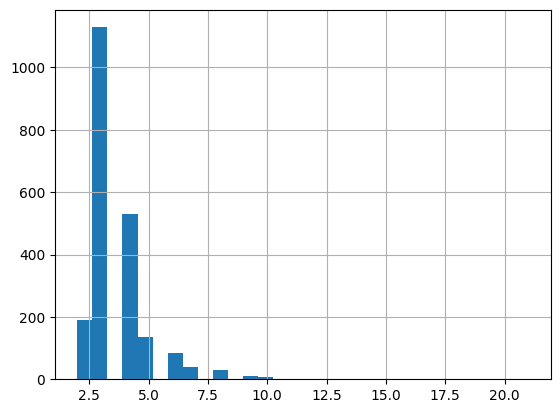

In [46]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [ ]:
# пример ссылки
url = stats.loc[0, 'link']
url

In [ ]:
from urllib import parse

In [ ]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

In [ ]:
parsed = parse.urlsplit(url)
parsed

In [ ]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

In [ ]:
# как доставать значения

parsed.netloc

In [ ]:
params = parse.parse_qs(parsed.query)
params

In [ ]:
# вот и кампании

params['utm_campaign'][0]

In [ ]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

In [ ]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [ ]:
# проверяем датафрейм
stats.head()

In [ ]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

### Как передать в функцию несколько аргументов

In [ ]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [ ]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

# Группировки

In [ ]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

Объединим процесс разбиения на датафреймы

In [ ]:
def groupby_function(data):
    return data.amount.max() - data.amount.min()

In [ ]:
df.groupby('country').apply(groupby_function)

Вернемся к статистике рекламных кампаний

In [ ]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

In [ ]:
# более универсальный способ

stats.groupby('campaign').count().head()

In [ ]:
stats.groupby('campaign').count()[['group', 'effect']].head()

### Как вернуть столбец из индекса - метод reset_index()

In [ ]:
stats.groupby('campaign').count().reset_index().head()

### К группировке можно применять разные функции такие образом:

In [ ]:
obj = stats.groupby('campaign')

In [ ]:
obj.max().head()

In [ ]:
obj.mean().head()

### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 